## Preparatory work

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
import pandas as pd

In [2]:
#Check data shape, 1797 images with 64 pixels each, 8x8
print(digits.data.shape)
print(type(digits))

(1797, 64)
<class 'sklearn.utils.Bunch'>


In [3]:
#Check what an image looks like in pixel values
digits.data[2]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

In [4]:
#Check all targets
import sys 
np.set_printoptions(threshold=sys.maxsize)
print(digits.target)
#Check observation 0
print(digits.target[0])

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 3 1 3 9 1
 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 5 4 8 8 4 9 0 8 9 8 0 1 2
 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9
 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8
 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2
 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 3 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0
 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2
 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7
 6 8 4 3 1 4 0 5 3 6 9 6 

In [5]:
#0=0 , 1=1 etc.
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
#Check to make sure both the data and targets are np arrays. 
print(type(digits.data))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
#Make x & y variables from the data and it's target value
x=digits.data
y=digits.target
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


## Now begin to work with nearest neighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
#Randomly separate data into training and testing using command test_train_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [10]:
#To find optimal K, use for loop testing for k=[1:26]

k_values = np.arange(1,26)
scores = []
for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

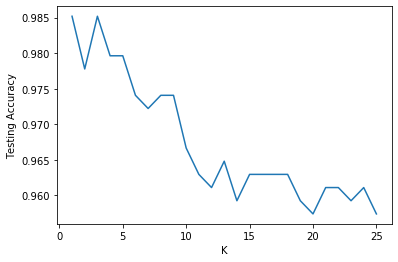

In [11]:
# Using Matplotlib, create visual representing testing accuracy as a function of K,K=3 looks to be the best after trying 3 
#different random_states (5,3,100).  I'll proceed with k=3

%matplotlib inline

plt.plot(k_values, scores)
plt.xlabel('K')
plt.ylabel('Testing Accuracy')

In [12]:
#Get exact information using K=3,call model knn3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
y_pred = knn3.predict(x_test)
metrics.accuracy_score(y_pred,y_test)
    

0.9851851851851852

In [13]:
#Fixing K at 3 and using a forloop to test the best training to testing ratio, from 0.2-0.8 in increments of 0.05.
ratios = np.arange(0.2,0.8,0.05)
scores = []
for r in ratios: 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=r, random_state=50)
    knn3.fit(x_train, y_train)
    y_pred = knn3.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

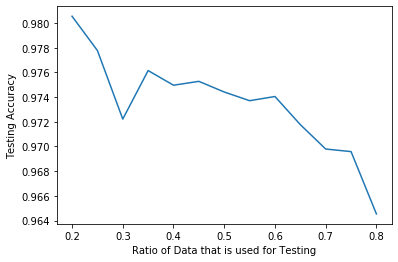

In [14]:
#Running it multiple times with different random states, I'm going to use the 0.35 for the testing ratio. 
%matplotlib inline

plt.plot(ratios, scores)
plt.xlabel('Ratio of Data that is used for Testing')
plt.ylabel('Testing Accuracy')

## Final model using K=3 and 0.35 testing ratio

In [15]:
#Generate the final accuracy of the model. I tried different random states, scores all > 0.98
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=10)
knnfinal = KNeighborsClassifier(n_neighbors=3)
knnfinal.fit(x_train, y_train)
y_pred = knnfinal.predict(x_test)
print('Overall accuracy:', metrics.accuracy_score(y_pred,y_test))

Overall accuracy: 0.9888712241653418


8


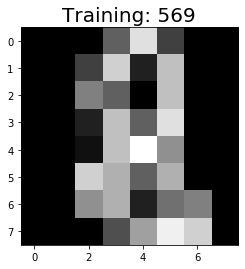

In [16]:
#Display a photo. I randomly chose 569, which looks like a 2 to me, but I checked the target of image 569 and it is an 8. 
plt.figure(figsize=(20,4))
image = digits.data[569]
plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
plt.title('Training: 569' % image, fontsize = 20)
print(digits.target[569])

In [17]:
#Interestingly enough, it correctly classified the image as an 8, although it gives 1/3 chance of being a 2.
print(knn3.predict([image]))
print(knn3.predict_proba([image]))



[8]
[[0.         0.         0.33333333 0.         0.         0.
  0.         0.         0.66666667 0.        ]]


In [18]:
#Compare accuracy scores, 
#According to the SKlearn_Images1 notebook, the accuracy of the model was 0.84
print('Logistic Regression Accuracy score: 0.84')
print('Overall accuracy:', metrics.accuracy_score(y_pred,y_test))

Logistic Regression Accuracy score: 0.84
Overall accuracy: 0.9888712241653418
